# How to make pandas go <font color='red'>slow</font>

In [23]:
pd.set_option('max_rows',12)
%matplotlib inline

In [1]:
df = pd.DataFrame(np.random.randn(10000,2),columns=list('AB'))

In [10]:
def f_baseline(df):
    return df['A']+1
    
def f_apply(df):
    return df.apply(lambda x: x['A'] + 1, axis=1)

def f_itertuples(df):
    l = []
    for row in df.itertuples():
        l.append(row[1]+1)
    return Series(l,name='A')

def f_iterrows(df):
    l = []
    for rowindex, row in df.iterrows():
        l.append(row['A']+1)
    return Series(l,name='A')

def f_index(df):
    s = df.A.copy()
    for i in range(len(s)):
        s.iloc[i] += 1
    return s

def f_index2(df):
    l = []
    for i in range(len(df)):
        l.append(df.iloc[i,0] + 1)
    return Series(l,name='A')


In [11]:
results = [f_baseline(df), f_itertuples(df), f_apply(df), f_iterrows(df), 
           f_index(df), f_index2(df)]

In [12]:
from itertools import imap, permutations
np.array(list(imap(lambda x: x[0].equals(x[1]), permutations(results, 2)))).all()

True

In [16]:
%timeit -n 100 -r 1 f_baseline(df)

100 loops, best of 1: 69.6 µs per loop


In [17]:
%timeit f_itertuples(df)

100 loops, best of 3: 6.06 ms per loop


In [18]:
%timeit f_apply(df)

10 loops, best of 3: 96.6 ms per loop


In [19]:
%timeit f_iterrows(df)

1 loops, best of 3: 227 ms per loop


In [20]:
%timeit f_index(df)

1 loops, best of 3: 728 ms per loop


In [21]:
%timeit f_index2(df)

1 loops, best of 3: 926 ms per loop


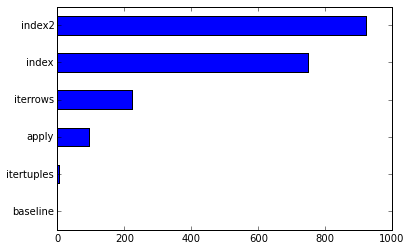

In [24]:
s = Series([66.1/1000,5.68,93.7,223,747,921],['baseline','itertuples','apply','iterrows','index','index2'])
s.plot(kind='barh')